# _DESARROLLO LABORATORIO 11_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import scipy.stats as stats #Para calculo de p-values, prob estadisticas
from sklearn.model_selection import train_test_split # Para particionamiento de datos
from sklearn.preprocessing import StandardScaler #Para estandarizacion
from sklearn.preprocessing import MinMaxScaler #Para normalizacion
from sklearn.metrics import euclidean_distances, silhouette_score #Para obtener valores de silueta
from sklearn.cluster import KMeans #Para utilizar el método KMeans
from sklearn.decomposition import PCA #para el analisis componentes principales

In [2]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

**Obteniendo la data**

In [3]:
miArchivo="democracias_latam.sav"
df_democracia=pd.read_spss(miArchivo)
df_democracia.head()

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv
0,Democracia plena,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41
1,Democracia plena,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71
2,Democracia debil,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24
3,Democracia debil,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65
4,Democracia debil,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41


In [4]:
df_democracia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tipoddem  20 non-null     category
 1   pais      20 non-null     object  
 2   posicion  20 non-null     float64 
 3   puntaj    20 non-null     float64 
 4   ppelec    20 non-null     float64 
 5   fdelgob   20 non-null     float64 
 6   partpk    20 non-null     float64 
 7   cultpk    20 non-null     float64 
 8   libciv    20 non-null     float64 
dtypes: category(1), float64(7), object(1)
memory usage: 1.6+ KB


In [5]:
df=df_democracia.iloc[:,2:]
df.head()

,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv
0,25.0,8.04,9.58,8.21,6.11,6.88,9.41
1,27.0,7.96,10.00,8.21,5.00,6.88,9.71
2,54.0,6.63,8.75,5.00,5.56,5.63,8.24
3,81.0,5.98,8.33,5.71,4.44,3.75,7.65
4,42.0,7.38,9.58,7.86,4.44,5.63,9.41


**1.Número óptimo de clúster según método del codo y silueta aplicando kmeans.**

In [6]:
#Instanciando un objeto de clase StandardScaler
sc=StandardScaler()
X_Std=sc.fit_transform(df)

In [7]:
X_Std[0:10]

array([[-1.66945207,  1.57474365,  0.71565194,  1.51011233,  1.61551782,
         1.80093364,  0.963626  ],
       [-1.59234112,  1.50298091,  0.94883566,  1.51011233,  0.44078819,
         1.80093364,  1.16055229],
       [-0.55134329,  0.30992534,  0.25483649, -0.44608645,  1.03344458,
         0.67647457,  0.19561345],
       [ 0.48965453, -0.27314693,  0.02165277, -0.01340697, -0.1518682 ,
        -1.01471186, -0.19167493],
       [-1.01400899,  0.98270103,  0.71565194,  1.29681962, -0.1518682 ,
         0.67647457,  0.963626  ],
       [-1.47667469,  1.44018851,  0.71565194,  1.94888588,  0.44078819,
         1.23420627,  1.16055229],
       [-0.05012212,  0.10360746,  0.48802021, -0.83610739,  0.44078819,
        -0.44798449,  0.77326391],
       [ 0.21976621, -0.13859179,  0.48802021, -0.87876593, -1.32659783,
         0.67647457,  0.19561345],
       [ 0.06554431, -0.05785871,  0.48802021, -0.18404113, -0.73394144,
        -0.44798449,  0.19561345],
       [ 0.33543263, -0.1924

## KMEANS 

**Usando el metodo del codo para numero optimo de clusters**

In [8]:
inercia=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             tol=0.0004,
             random_state=2020)
    km.fit(X_Std)
    inercia.append(km.inertia_)

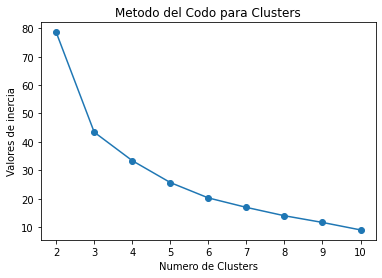

In [9]:
plt.plot(range(2,11),inercia,marker='o')
plt.title('Metodo del Codo para Clusters')
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores de inercia')
plt.show()

    Obtenemos que el numero 3 es el numero de clusters optimo segun el metodo del codo

**Usando el metodo de siluetas para numero optimo de clusters**

In [10]:
silueta = [] #crear un objeto vacío tipo lista
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10,
                    random_state = 2020)
    silueta.append(silhouette_score(X_Std, #datos
                                kmeans.fit_predict(X_Std))) #etiquetas para cada observación

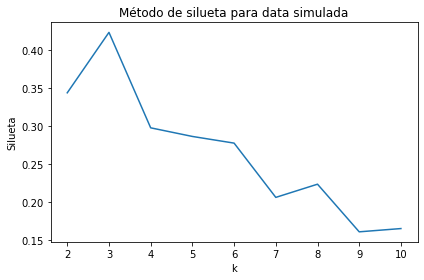

In [11]:
plt.plot(range(2, 11),
         silueta)
plt.ylabel("Silueta")
plt.xlabel("k")
plt.title("Método de silueta para data simulada")
plt.tight_layout()
plt.show()

**Segun metodo de siluetas el numero de clusters optimos a usar son 3**

    Gráfico de Silueta

In [12]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 4)

def Grafico_de_silueta(X,n_cluster_list,init,n_init,max_iter,tol,semilla):
    cont=0
    for i in n_cluster_list:
        cont += 1
        plt.subplot(1, 4, cont)
        km = KMeans(n_clusters=i, 
                        init=init,  #elija k observaciones (filas) para los centroides iniciales
                        n_init=n_init, #número de veces que el algoritmo se ejecutará
                        max_iter=max_iter, #número máximo de iteraciones para una ejecución
                        tol=tol, #tolerancia para declarar convergencia
                        random_state=semilla) #semilla
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km) #valores de clúster
        n_clusters = cluster_labels.shape[0] #núnero de clústers
        silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #valores de silueta teniendo en cuenta la distancia euclideana

        y_ax_lower, y_ax_upper = 0, 0
        yticks = [] #objeto tipo lista vacío
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c] #valores de silueta cuando y_km toma el valor c de los posibles n de clúster
            c_silhouette_vals.sort() #se ordenan de menor a mayor los valores de silueta
            y_ax_upper += len(c_silhouette_vals) #número de valores de silueta
            color = cm.jet(float(i) / km.n_clusters) # definir el color
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                     edgecolor='none', color=color) #visualización de los valores de silueta para k
            yticks.append((y_ax_lower + y_ax_upper) / 2.)
            y_ax_lower += len(c_silhouette_vals)
        silhouette_avg = np.mean(silhouette_vals)#media de los valores de silueta
        plt.axvline(silhouette_avg, color="red", linestyle="--") # mostrar una línea con los valores medios de silueta
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Coeficiente de Silueta')
        plt.title("Silouette para k= " + str(km.n_clusters) + "\n" + "Coeficiente de Silueta= "+str(round((silhouette_avg),2)))
        plt.tight_layout()
        plt.show()

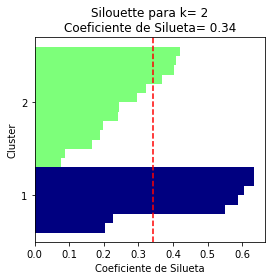

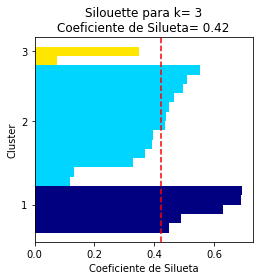

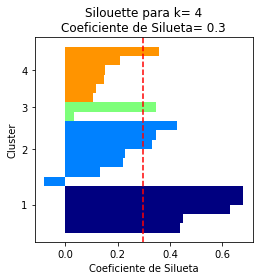

In [13]:
#Defino el numero de cluster en un array
n_cluster_list=[2,3,4]
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_silueta(X_Std,n_cluster_list,init,n_init,max_iter,tol,semilla)

**_El coeficiente de silueta es mayor cuando k=3_**

**2.Data Frame donde se muestre la data incial y la etiqueta de clúster kmeans**

In [15]:
#Creamos una instancia de K-Means 
km=KMeans(n_clusters=3,# numero de clusters
         init='k-means++', #centroides iniciales
         n_init=10, #numero de veces que se ejecutará el algoritmo
         tol=0.0004,#tolerancia para declarar la convergencia
         random_state=2020)#semilla

In [16]:
#Obteniendo las etiquetas de clusters
y_km=km.fit_predict(X_Std)
y_km

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1])

In [17]:
df_democracia['cluster']=y_km

In [18]:
df_democracia.head()

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv,cluster
0,Democracia plena,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41,0
1,Democracia plena,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71,0
2,Democracia debil,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24,1
3,Democracia debil,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65,1
4,Democracia debil,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41,0


**3. Realizando un análisis de componentes principales, visualizar las etiquetas predichas.**

In [19]:
cov_mat = np.cov(df.T)

In [20]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [21]:
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[7.16360872e+02 2.08595367e+00 1.24738553e+00 3.49827463e-01
 2.49689736e-01 6.30611124e-02 4.56513700e-06]


In [22]:
(eigen_vals>1).sum() #CRITERIO DE KEISER , valor obtenido = 3

3

In [23]:
pca = PCA() #función PCA() la guardamos en el objeto pca
df_pca = pca.fit_transform(df)
#fit_transform
pca.explained_variance_ratio_

array([9.94452857e-01, 2.89572290e-03, 1.73162181e-03, 4.85630823e-04,
       3.46619534e-04, 8.75414973e-05, 6.33732761e-09])

*PCA*

In [24]:
pca=PCA(n_components=3)
x3comp=pca.fit_transform(X_Std)
print(x3comp)

[[-3.64980323 -1.0459456   0.62098365]
 [-3.4605844   0.02665836  0.80917447]
 [-0.90456118 -1.00955    -0.49184929]
 [ 0.81276625  0.41620338 -0.32732093]
 [-2.18315486  0.70104232  0.55119876]
 [-3.23620064  0.2395192   0.96268794]
 [-0.22541715  0.01838136 -1.35365289]
 [ 0.27527053  0.85478459 -0.18717334]
 [ 0.19555624  0.91920759 -0.34981498]
 [ 0.62712097  1.84035651  0.78254867]
 [ 0.10024913  0.00622807  0.57728124]
 [-0.88212933 -0.14322429 -0.17530993]
 [-2.12903053 -0.45581414  0.03906855]
 [ 0.22530902 -0.24484069 -0.67022931]
 [ 0.29413542 -1.09950572 -1.37031569]
 [ 1.51353156 -0.08559126 -1.27707018]
 [ 4.15904403  1.18237874 -0.16677905]
 [ 1.70947429 -1.78646006 -0.35209168]
 [ 5.30481247 -1.6108831   2.26582604]
 [ 1.45361139  1.27705476  0.11283796]]


In [25]:
df_x=pd.DataFrame(x3comp,columns=['PC1','PC2','PC3'])
df_x['Cluster']=y_km
df_x.head(10)

,PC1,PC2,PC3,Cluster
0,-3.649803,-1.045946,0.620984,0
1,-3.460584,0.026658,0.809174,0
2,-0.904561,-1.009550,-0.491849,1
3,0.812766,0.416203,-0.327321,1
4,-2.183155,0.701042,0.551199,0
5,-3.236201,0.239519,0.962688,0
6,-0.225417,0.018381,-1.353653,1
7,0.275271,0.854785,-0.187173,1
8,0.195556,0.919208,-0.349815,1
9,0.627121,1.840357,0.782549,1


**4.Teniendo en cuenta el método de k-means realizar un análisis clúster de k = 4 (k criterio de experto) y agregar la etiqueta a la data inicial.**

In [26]:
#Creamos una instancia de K-Means 
km=KMeans(n_clusters=4,# numero de clusters
         init='k-means++', #centroides iniciales
         n_init=10, #numero de veces que se ejecutará el algoritmo
         tol=0.0004,#tolerancia para declarar la convergencia
         random_state=2020)#semilla

In [27]:
#Obteniendo las etiquetas de clusters
y_km=km.fit_predict(X_Std)
y_km

array([0, 0, 3, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 2, 3, 2, 1])

In [28]:
df_democracia['Cluster-4']=y_km

In [29]:
df_democracia.head()

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv,cluster,Cluster-4
0,Democracia plena,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41,0,0
1,Democracia plena,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71,0,0
2,Democracia debil,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24,1,3
3,Democracia debil,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65,1,1
4,Democracia debil,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41,0,0


**5.Perfilamiento del modelo k-means según el óptimo de clúster.**

In [31]:
#Creamos una instancia de K-Means 
km=KMeans(n_clusters=3,# numero de clusters (NÚMERO OPTIMO DE CLUSTERS)
         init='k-means++', #centroides iniciales
         n_init=10, #numero de veces que se ejecutará el algoritmo
         tol=0.0004,#tolerancia para declarar la convergencia
         random_state=2020)#semilla

In [32]:
#Obteniendo las etiquetas de clusters
y_km=km.fit_predict(X_Std)
y_km

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1])

In [33]:
y_kmeans=pd.DataFrame(y_km,columns=['cluster_label'])
y_kmeans.head()

,cluster_label
0,0
1,0
2,1
3,1
4,0


In [34]:
x_df=pd.DataFrame(df,columns=df.columns)
x_df

,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv
0,25.0,8.04,9.58,8.21,6.11,6.88,9.41
1,27.0,7.96,10.00,8.21,5.00,6.88,9.71
2,54.0,6.63,8.75,5.00,5.56,5.63,8.24
3,81.0,5.98,8.33,5.71,4.44,3.75,7.65
4,42.0,7.38,9.58,7.86,4.44,5.63,9.41
5,30.0,7.89,9.58,8.93,5.00,6.25,9.71
6,67.0,6.40,9.17,4.36,5.00,4.38,9.12
7,74.0,6.13,9.17,4.29,3.33,5.63,8.24
8,70.0,6.22,9.17,5.43,3.89,4.38,8.24
9,77.0,6.07,8.75,6.79,2.78,4.38,7.65


In [35]:
datafinal=pd.concat([x_df,y_kmeans],axis=1)
datafinal.head()

,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv,cluster_label
0,25.0,8.04,9.58,8.21,6.11,6.88,9.41,0
1,27.0,7.96,10.00,8.21,5.00,6.88,9.71,0
2,54.0,6.63,8.75,5.00,5.56,5.63,8.24,1
3,81.0,5.98,8.33,5.71,4.44,3.75,7.65,1
4,42.0,7.38,9.58,7.86,4.44,5.63,9.41,0


In [36]:
#Trabajando la media por clusters
cluster_means=datafinal.groupby(['cluster_label']).mean().round(1)
cluster_means

,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv
cluster_label,,,,,,,
0,33.6,7.7,9.7,8.1,5.2,6.3,9.4
1,74.2,6.1,8.5,5.1,4.5,4.6,7.9
2,116.5,3.9,3.7,4.1,3.3,3.4,4.7
